Для любой модели из курса и данных на которых она строилась: примнить метод главных компонент к данным, и сравнить работу модели на исходных данных с работой на данных где в качестве признаков используются две главные компоненты.

In [104]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_blobs
%matplotlib inline

In [105]:
def log_loss_and_grad(w, X, target):
    m = X.shape[0]
    y=(2*target-1)
    score=np.dot(X, w.T).flatten()
    
    # Рассчёт log_loss
    loss = np.sum(np.log(1+np.exp(-y*score)))/m 
    
    # Рассчёт градиента
    Z=-y/(m*(1+np.exp(y*score)))
    grad=Z[np.newaxis, :].dot(X)
    return loss, grad


def optimize(w, X, y, n_iterations, eta):
    #     потери будем записывать в список для отображения в виде графика
    losses = []
    
    for i in range(n_iterations):        
        loss, grad = log_loss_and_grad(w, X, y)
        w = w - eta * grad
        losses.append(loss)
        
    return w, losses

def predict(w, X):
    y_predicted = np.zeros(X.shape[0])  
    score=np.dot(X, w.T).flatten()
    Prob = 1/(1+np.exp(-score))
    
    #     За порог отнесения к тому или иному классу примем вероятность 0.5
    y_predicted[Prob>0.5]=1
    y_predicted[Prob<=0.5]=0
        
    return y_predicted

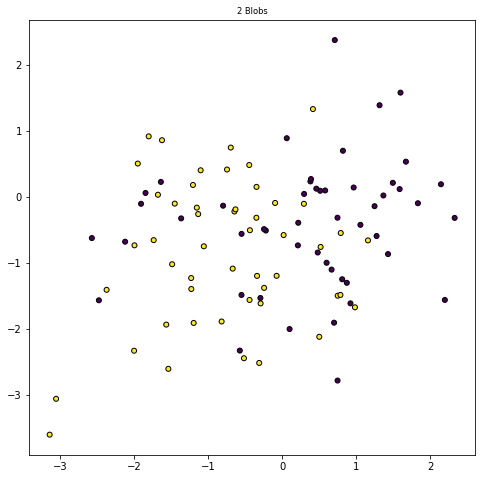

In [108]:
plt.figure(figsize=(8, 8))
plt.title("2 Blobs", fontsize='small')
X1, Y1 = make_blobs(n_samples =100, n_features=4, centers=2, center_box=(-1,1))
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')


In [109]:
classes=[]
classes.append(X1)
classes.append(Y1)
classes=tuple(classes)
classes

(array([[ 1.16120751, -0.65659853,  0.49155123, -0.09888526],
        [ 0.41759754,  1.33319031, -0.75238636, -1.23496901],
        [-3.0536151 , -3.05680489, -1.21764652,  0.86176714],
        [-2.37111073, -1.40546705,  0.60903578,  0.19892763],
        [-1.19422475, -1.90736222, -0.32379093,  1.75900879],
        [-1.99433372, -0.7315249 , -0.90967017,  0.3394105 ],
        [-0.51458489, -2.44203665, -2.69439686, -0.44533247],
        [ 0.75221701, -1.49457983, -1.09980159, -0.20677807],
        [-0.33787645, -1.19425957, -0.64966685,  1.12633384],
        [-1.48499204, -1.0180017 , -0.55932884, -0.4617107 ],
        [ 0.75018132, -2.78027129,  0.37816065, -0.87716975],
        [ 1.83599966, -0.09354719,  0.73074027, -0.51495242],
        [-0.54706118, -0.55754143,  0.35020147, -1.56144862],
        [ 0.06375638,  0.8915462 ,  0.44289126, -0.24817165],
        [-1.6224355 ,  0.86102128, -1.64756842,  0.06552113],
        [ 0.38332927,  0.23697964, -0.49298109, -1.16714108],
        

In [110]:
# перемешивание датасета
np.random.seed(12)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]
    
print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (70, 4)
Размер массива признаков тестовой выборки (30, 4)
Размер массива ответов для обучающей выборки (70,)
Размер массива ответов для тестовой выборки (30,)


In [111]:
w0 = np.zeros((1, X_train.shape[1]))

n_iterations = 1000
eta = 0.07

w, losses = optimize(w0, X_train, y_train, n_iterations, eta)

y_predicted_test = predict(w, X_test)
y_predicted_train = predict(w, X_train)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test)*100.0)

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [[-0.81890777  0.01271235 -0.45857903  0.32269918]]
Точность на обучающей выборке: 74.286
Точность на тестовой выборке: 73.333


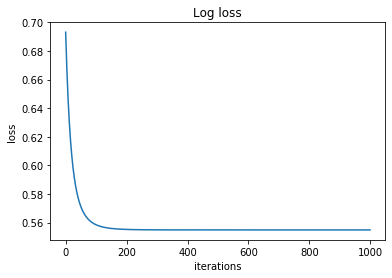

In [112]:
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses)

In [113]:
# Для начала отмасштабируем выборку
X_ = X_shuffled.astype(float)

rows, cols = X_.shape

# центрирование - вычитание из каждого значения среднего по строке
means = X_.mean(0)
for i in range(rows):
    for j in range(cols):
        X_[i, j] -= means[j]

# деление каждого значения на стандартное отклонение
std = np.std(X_, axis=0)
for i in range(cols):
    for j in range(rows):
        X_[j][i] /= std[i]

In [114]:
# Найдем собственные векторы и собственные значения
 
covariance_matrix = X_.T.dot(X_)

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения в порядке убывания:')
for i in eig_pairs:
    print(i[0])

Собственные значения в порядке убывания:
139.42338421512986
107.21686293722898
91.1372146253797
62.222538222261626


In [115]:
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описвыаемая каждой из компонент \n{var_exp}')

# а теперя оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описвыаемая каждой из компонент 
[34.85584605378245, 26.804215734307235, 22.784303656344917, 15.555634555565401]
Кумулятивная доля дисперсии по компонентам 
[ 34.85584605  61.66006179  84.44436544 100.        ]


In [116]:
# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.64334684  0.30577713]
 [ 0.53340025 -0.4165495 ]
 [ 0.49987025  0.39622898]
 [-0.22741757  0.75893969]]


In [117]:
# Сформируем новую матрицу "объекты-признаки"
Z = X_.dot(W)

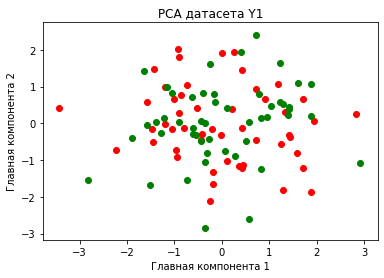

In [118]:
plt.figure()
y = Y1
for c, i in zip("rg", [0, 1]):
    plt.scatter(Z[y==i, 0], Z[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета Y1')
plt.show()

In [119]:
# перемешивание датасета
np.random.seed(12)
shuffle_index = np.random.permutation(Z.shape[0])
X_shuffled, y_shuffled = Z[shuffle_index], y[shuffle_index]


# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(Z) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]
    
print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (70, 2)
Размер массива признаков тестовой выборки (30, 2)
Размер массива ответов для обучающей выборки (70,)
Размер массива ответов для тестовой выборки (30,)


In [120]:
w0 = np.zeros((1, Z.shape[1]))

n_iterations = 1000
eta = 0.07

w, losses = optimize(w0, Z, y, n_iterations, eta)

y_predicted_test = predict(w, X_test)
y_predicted_train = predict(w, X_train)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test)*100.0)

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [[0.02234046 0.06089098]]
Точность на обучающей выборке: 48.571
Точность на тестовой выборке: 63.333


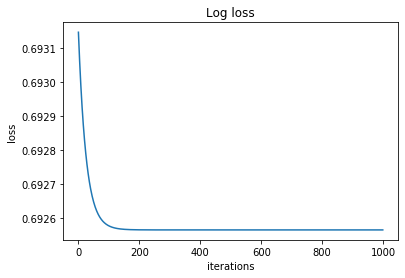

In [121]:
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses)